## Отчет


В качестве основы я взял тот пост https://www.oreilly.com/learning/an-illustrated-introduction-to-the-t-sne-algorithm
Очень полезная статья, но быстро выяснилось что там есть опечатки, из за которых я немного потупил. Потом решил взять оригинальную статью, и подтвердилось, что да - в посте опечатки. Дальше использовал оригинальную статью.

Основные подводные камни были с поиском оптимального $\sigma_i$ для каждой из точек. Так как при этом используются экспоненты от минус парных расстояний между точками, т.е. $\exp(-r^2_{ij})$, которые для оригинального датасета достаточно большие, то и экспоненты оказываются нулями, и поиск выдает мусор. Проблема решается нормализацией датасета (min/max масштабирование по каждой из координат). Еще оказалось полезным раскрыть все логарифмы в выражении для перплексии для повышения численной стабильности поиска оптимальной $\sigma_i$, а также оптимизировать по $1/\sigma_i^2$.  В финале оказалось, что все это слабо улучшает картинку на этом датасете и можно было брать константный $\sigma_i$ для всех точек.

Оптимизация KL дивергенции проводится градиентым спуском с моментом. Следуя оригинальной статье, на первых итерациях отптимизации используется завышенное значение для условных вероятностей точек датасета $p_{j|i}$. Темп обучения понижается в 1.5 раза каждые 500 итераций, начальный темп обучения был выбран 100. Алгоритм работает 3000 итераций. Полmзователь волен выбирать только значение перплексии для своего набора данных, остальные константы вшиты в алгоритм оптимизации

Ниже представлен пример компиляции и запуска алгоритма на MNIST

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import numpy as np

## Compilation

In [2]:
! mkdir -p build && cd build && cmake .. && make all

-- The C compiler identification is GNU 4.8.5
-- The CXX compiler identification is GNU 4.8.5
-- Check for working C compiler: /usr/bin/cc
-- Check for working C compiler: /usr/bin/cc -- works
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Check for working CXX compiler: /usr/bin/c++
-- Check for working CXX compiler: /usr/bin/c++ -- works
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Boost version: 1.53.0
-- Found the following Boost libraries:
--   program_options
-- Configuring done
-- Generating done
-- Build files have been written to: /us/dodzerik/code/ys/bigml/tsne/build
Scanning dependencies of target tools
[ 33%] Building CXX object src/CMakeFiles/tools.dir/utils.cpp.o
[ 66%] Building CXX object src/CMakeFiles/tools.dir/optimization.cpp.o
Linking CXX static library libtools.a
[ 66%] Built target tools
Scanning dependencies of target tsne
[100%] Building CXX object src/CMakeFiles/tsne.dir/tsne.cpp.o
Linking CXX exec

# Prepare data

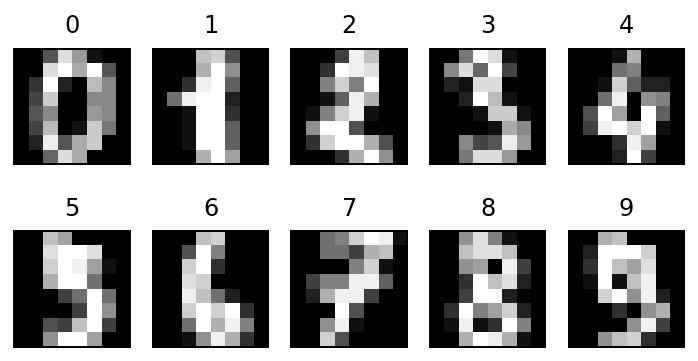

In [2]:
from sklearn.datasets import load_digits

digits = load_digits()

nrows, ncols = 2, 5
plt.figure(figsize=(6,3))
plt.gray()
for i in range(ncols * nrows):
    ax = plt.subplot(nrows, ncols, i + 1)
    ax.matshow(digits.images[i,...])
    plt.xticks([]); plt.yticks([])
    plt.title(digits.target[i])

In [3]:
from sklearn.preprocessing import minmax_scale

X = np.vstack([digits.data[digits.target==i] for i in range(10)])
y = np.hstack([digits.target[digits.target==i] for i in range(10)])
np.savetxt("digits.txt", minmax_scale(X))

In [5]:
import seaborn as sns
import matplotlib.patheffects as PathEffects

def scatter(x, colors):
    # We choose a color palette with seaborn.
    palette = np.array(sns.color_palette("hls", 10))

    # We create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40,
                    c=palette[colors.astype(np.int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    # We add the labels for each digit.
    txts = []
    for i in range(10):
        # Position of each label.
        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)

    return f, ax, sc, txts

## Get results

In [ ]:
%%time
! ./build/src/tsne --image-file=digits.txt --perplexity 5 -o map_points.txt

Loading file digits.txt
Running tSNE algorithm
Calculating optimal sigma
Initial KL loss 5.44587
KL loss: 2.26557
KL loss: 1.1204
KL loss: 0.790621
KL loss: 0.637941
KL loss: 0.553158
KL loss: 0.507697
KL loss: 0.476041
KL loss: 0.452881
KL loss: 0.3931
KL loss: 0.388421
KL loss: 0.385021
KL loss: 0.382022
KL loss: 0.379319
KL loss: 0.376893
KL loss: 0.374665
KL loss: 0.372971
KL loss: 0.371439
KL loss: 0.370016
KL loss: 0.368691
KL loss: 0.367453
KL loss: 0.36651
KL loss: 0.365637
KL loss: 0.364818
KL loss: 0.364043
KL loss: 0.363308
KL loss: 0.362723
KL loss: 0.362176
KL loss: 0.361658
KL loss: 0.36116
KL loss: 0.360688
KL loss: 0.360318
KL loss: 0.359967
KL loss: 0.359617
KL loss: 0.359243
KL loss: 0.358815
KL loss: 0.358394
KL loss: 0.357938
KL loss: 0.357496
KL loss: 0.357087
KL loss: 0.35671
KL loss: 0.356417
KL loss: 0.356146
KL loss: 0.355893
KL loss: 0.355658
Resulting KL loss 0.355438
Stored results to map_points.txt
CPU times: user 33.7 s, sys: 6.82 s, total: 40.5 s
Wall tim

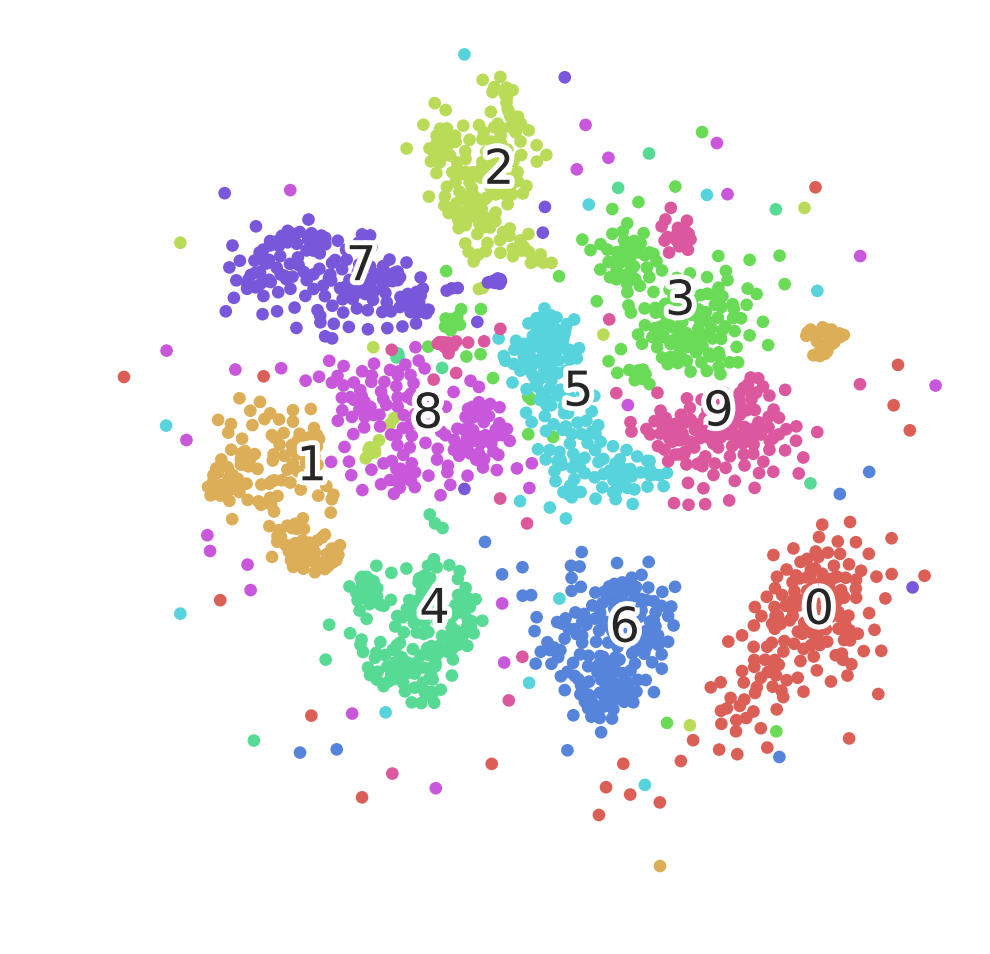

In [8]:
map_points = np.loadtxt("./map_points.txt")
_ = scatter(map_points, y)